In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [293]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU_2']")
results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,"knee(x,y)",time
1,ProximalPhalanxOutlineCorrect,logistic-regression,BU_1,0.91,"(0.04443037974683545, 0.0)",0.28
2,ProximalPhalanxOutlineCorrect,logistic-regression,VW,0.80,"(1.0, 1.0)",0.02
3,ProximalPhalanxOutlineCorrect,logistic-regression,RDP,0.89,"(0.13151898734177217, 1.0)",0.56
6,ItalyPowerDemand,logistic-regression,BU_1,0.91,"(0.14608695652173911, 0.4471744471744472)",0.05
8,MoteStrain,decision-tree,BU_1,0.91,"(1.0120481927710847, 1.0)",0.31


In [294]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc  val_acc  test_acc                dataset
0        decision-tree       0.78     0.20      0.53                    CBF
1  logistic-regression       0.78     0.20      0.33                    CBF
2                  knn       1.00     0.60      0.76                    CBF
3                  cnn       0.97     0.39      0.91                    CBF
4        decision-tree       1.00     0.33      0.60  SonyAIBORobotSurface1
5  logistic-regression       0.75     0.33      0.43  SonyAIBORobotSurface1


In [295]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type    dataset  Train   Test   Class  Length  ED (w=0)  \
0   1      Image      Adiac     390    391     37     176      0.39   
1  90  Simulated        BME      30    150      3     128      0.17   
2   7  Simulated        CBF      30    900      3     128      0.15   
3  91    Traffic  Chinatown      20    343      2      24      0.05   
4  92      Image       Crop    7200  16800     24      46      0.29   

  DTW (learned_w)   DTW (w=100)  Default rate Stationary  Seasonal  Entropy  
0       0.3913 (3)     3.96e-01          0.96       True      True     0.27  
1       0.0200 (4)     1.00e-01          0.67      False      True     0.12  
2      0.0044 (11)     3.30e-03          0.66      False     False     0.83  
3       0.0466 (0)     4.37e-02          0.27      False     False     0.23  
4       0.2883 (0)     3.35e-01          0.96      False     False     0.37  


## All Results

In [296]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
#print(f"List of all Datasets {datasets}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets ProximalPhalanxOutlineCorrect ItalyPowerDemand MoteStrain GunPointOldVersusYoung MiddlePhalanxTW ECG200 SonyAIBORobotSurface1 ElectricDevices BME Chinatown DistalPhalanxOutlineAgeGroup MedicalImages TwoPatterns UMD ECG5000 TwoLeadECG GunPointAgeSpan MiddlePhalanxOutlineAgeGroup ProximalPhalanxOutlineAgeGroup ProximalPhalanxTW SmoothSubspace Plane MiddlePhalanxOutlineCorrect Adiac SwedishLeaf ECGFiveDays PhalangesOutlinesCorrect FacesUCR CBF DistalPhalanxOutlineCorrect DistalPhalanxTW Wafer
Number of Datasets: 32
['logistic-regression' 'decision-tree' 'knn' 'cnn']
4
['BU_1' 'VW' 'RDP' 'OS' 'BU_2']
5


#### Sum AULC

In [297]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_all = results.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU_1: ", bu_alg_sum_all)
print("BU_2: ", bu_2_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  74.0552934731049
RDP:  75.37303308550787
BU_1:  77.58140345543242
BU_2:  26.262069185948484
VW:  69.7158990401033


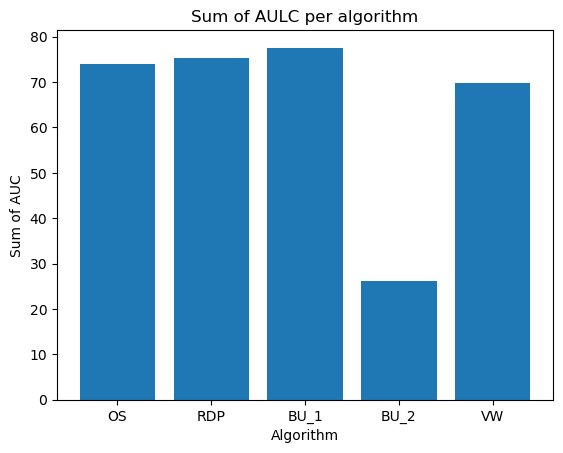

In [298]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all,bu_2_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [299]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_all = results.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU_1: ", bu_alg_mean_all)
print("BU_2: ", bu_2_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.8922324514831915
RDP:  0.8867415657118572
BU_1:  0.9127223935933226
BU_2:  0.8206896620608901
VW:  0.820187047530627


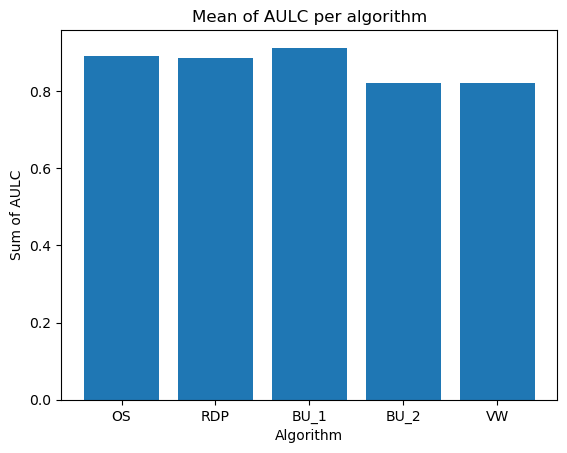

In [300]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, bu_2_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU_1','BU_2', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [301]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU_1"').groupby("model")["performance"].mean()
bu_2_alg_all_per_model = results.query('simp_algorithm == "BU_2"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU_1: ", bu_alg_all_per_model)
print("BU_2: ", bu_2_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.90
decision-tree          0.89
knn                    0.89
logistic-regression    0.89
Name: performance, dtype: float64
RDP:  model
cnn                    0.89
decision-tree          0.89
knn                    0.89
logistic-regression    0.89
Name: performance, dtype: float64
BU_1:  model
cnn                    0.91
decision-tree          0.91
knn                    0.91
logistic-regression    0.91
Name: performance, dtype: float64
BU_2:  model
cnn    0.82
Name: performance, dtype: float64
VC:  model
cnn                    0.86
decision-tree          0.80
knn                    0.80
logistic-regression    0.80
Name: performance, dtype: float64


/tmp/ipykernel_7823/3523913664.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_7823/3523913664.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_7823/3523913664.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_7823/3523913664.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_7823/3523913664.py:23: UserWarning: set_ticklabels(

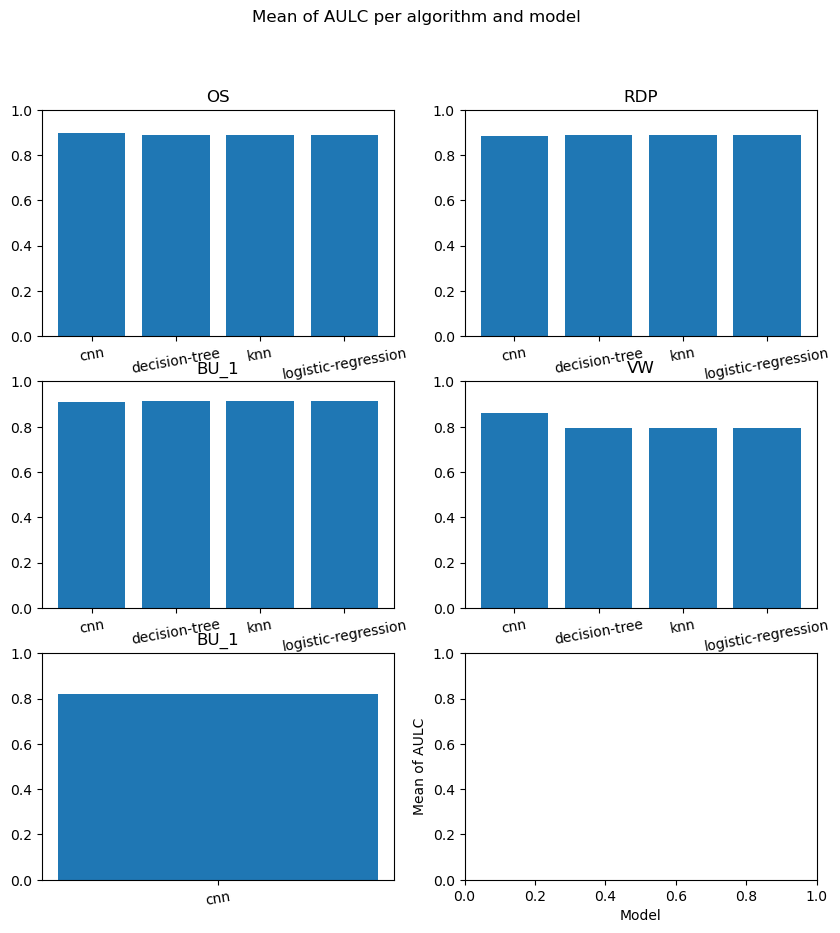

In [302]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU_1')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

ax[2, 0].bar(bu_2_alg_all_per_model.index, bu_2_alg_all_per_model.values)
ax[2, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[2, 0].set_title('BU_1')
ax[2, 0].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [303]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.91
decision-tree          0.67
knn                    1.00
logistic-regression    0.56
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

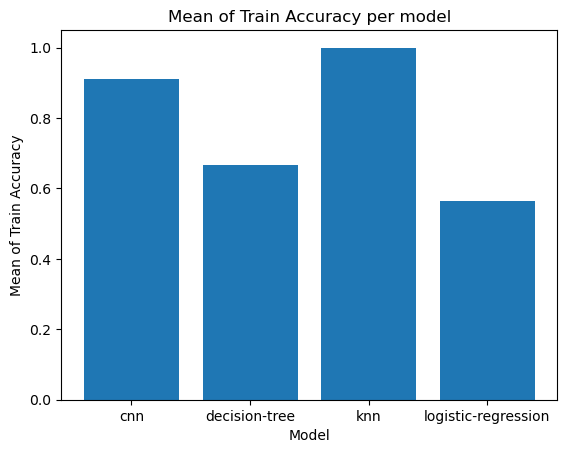

In [304]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [305]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.73
decision-tree          0.45
knn                    0.64
logistic-regression    0.46
Name: val_acc, dtype: float64

Text(0, 0.5, 'Mean of Validation Accuracy')

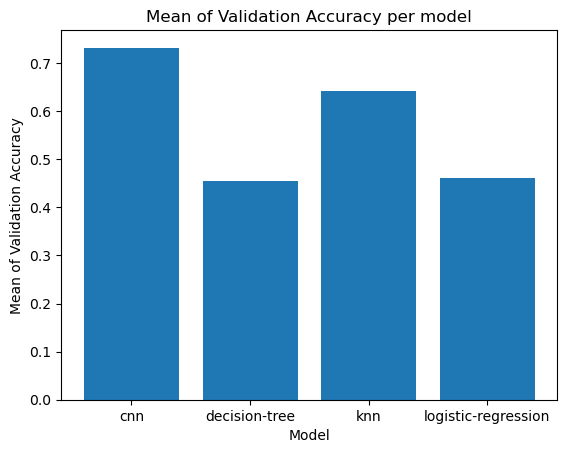

In [306]:
plt.bar(models_mean_perf_val.index, models_mean_perf_val.values)    #type: ignore
plt.title('Mean of Validation Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Validation Accuracy')

### By Class

In [307]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'Crop': 24, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ECG5000': 5, 'ECGFiveDays': 2, 'ElectricDevices': 7, 'FaceAll': 14, 'FacesUCR': 14, 'GunPoint': 2, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'MoteStrain': 2, 'PhalangesOutlinesCorrect': 2, 'Plane': 7, 'PowerCons': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SonyAIBORobotSurface2': 2, 'SwedishLeaf': 15, 'SyntheticControl': 6, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3, 'Wafer': 2}


In [308]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,0.78,0.20,0.53,CBF,3
1,logistic-regression,0.78,0.20,0.33,CBF,3
2,knn,1.00,0.60,0.76,CBF,3
3,cnn,0.97,0.39,0.91,CBF,3
4,decision-tree,1.00,0.33,0.60,SonyAIBORobotSurface1,2
...,...,...,...,...,...,...
152,cnn,0.79,0.74,0.58,DistalPhalanxTW,6
153,decision-tree,1.00,1.00,1.00,GunPointOldVersusYoung,2
154,logistic-regression,1.00,1.00,1.00,GunPointOldVersusYoung,2
155,knn,1.00,1.00,1.00,GunPointOldVersusYoung,2


#### Train Accuracy

In [309]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

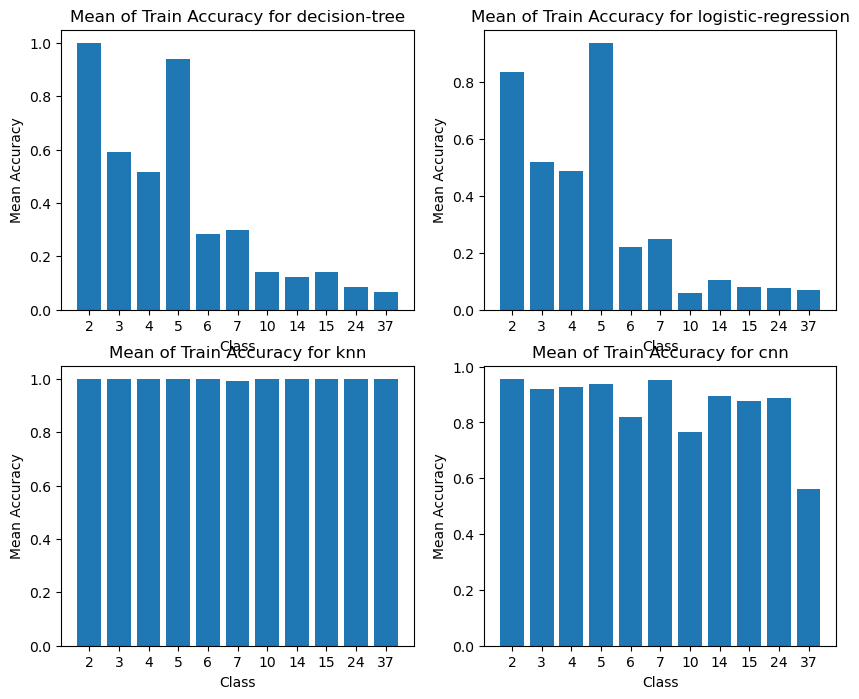

In [310]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [311]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

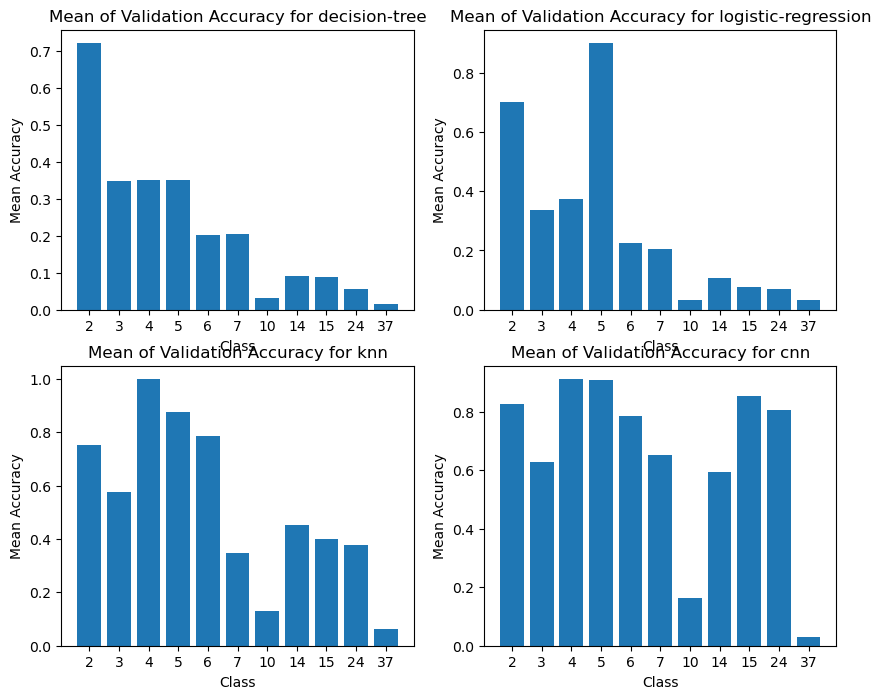

In [312]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Validation Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

## Only for CNN

In [313]:
results_cnn = results.query('model == "cnn"')

#### Sum AULC

In [314]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU_1: ", bu_alg_sum_cnn)
print("BU_2: ", bu_2_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AULC per algorithm
OS:  28.65102733473747
RDP:  28.325259069424742
BU_1:  29.097094574954788
BU_2:  26.262069185948484
VW:  27.508007671563007


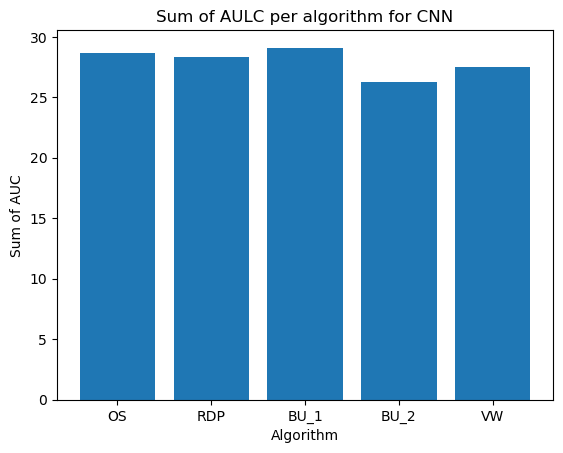

In [315]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, bu_2_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [316]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU_1: ", bu_alg_mean_cnn)
print("BU_2: ", bu_2_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.895344604210546
RDP:  0.8851643459195232
BU_1:  0.9092842054673371
BU_2:  0.8206896620608901
VW:  0.859625239736344


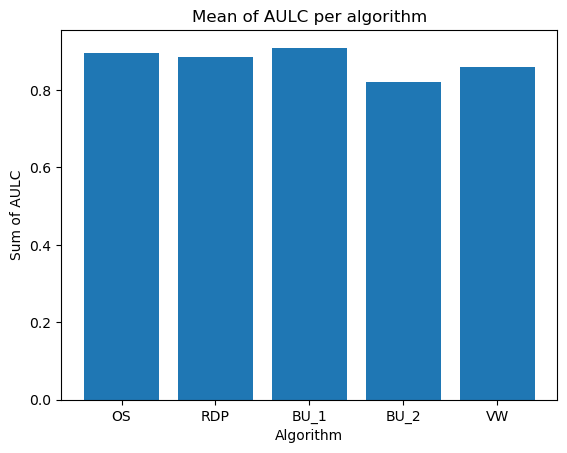

In [317]:
mean_auc_cnn = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, bu_2_alg_mean_cnn, vw_alg_mean_cnn]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],mean_auc_cnn)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

### By Class:

In [318]:
results_cnn_class = results_cnn
results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)
#print(results_cnn_class.head(5))

/tmp/ipykernel_7823/3098996261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [319]:
results_cnn_alg_class = results_cnn_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_cnn_alg_class)

In [320]:
results_cnn_alg_class_mean = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_cnn_alg_class_mean)
results_cnn_alg_class_std = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_cnn_alg_class_std)


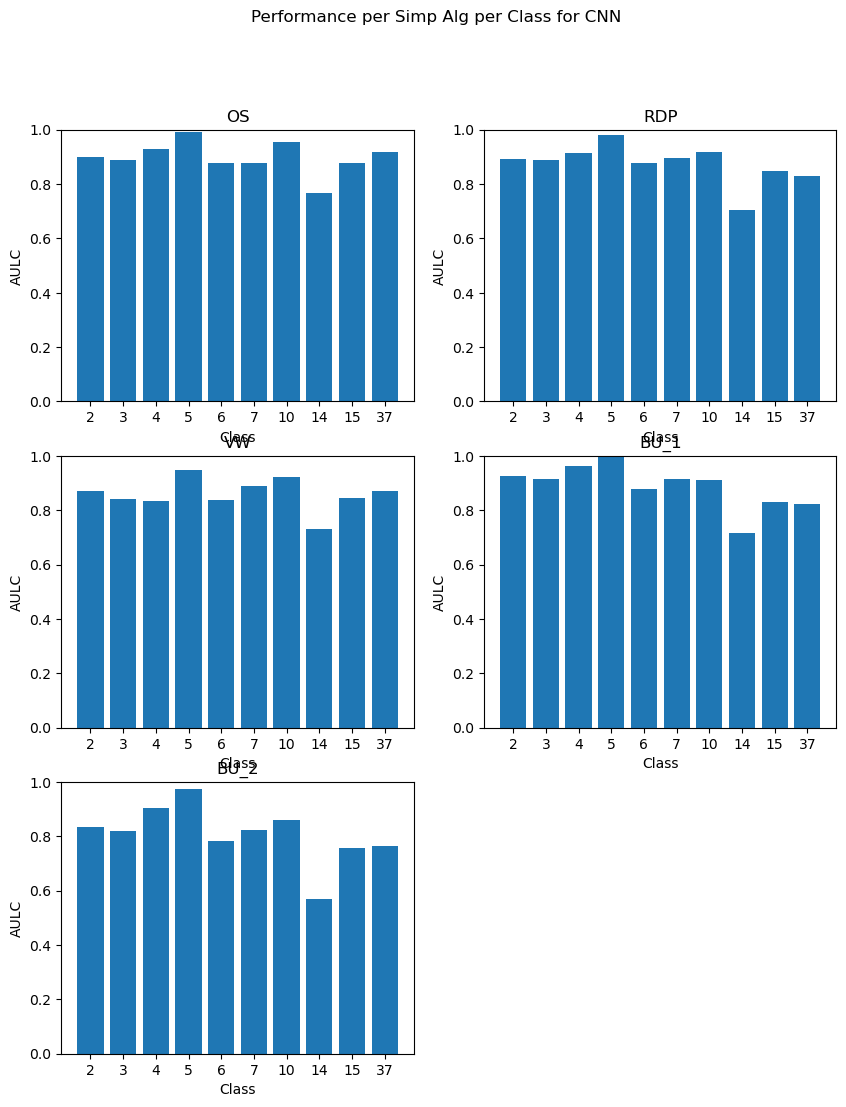

In [321]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

Binary vs Multicalss

In [322]:
results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_cnn_alg_bin_vs_mc_mean = results_cnn_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_cnn_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU_1            binary        0.93
                multiclass    0.90
BU_2            binary        0.84
                multiclass    0.81
OS              binary        0.90
                multiclass    0.89
RDP             binary        0.89
                multiclass    0.88
VW              binary        0.87
                multiclass    0.85
Name: performance, dtype: float64


/tmp/ipykernel_7823/705144334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


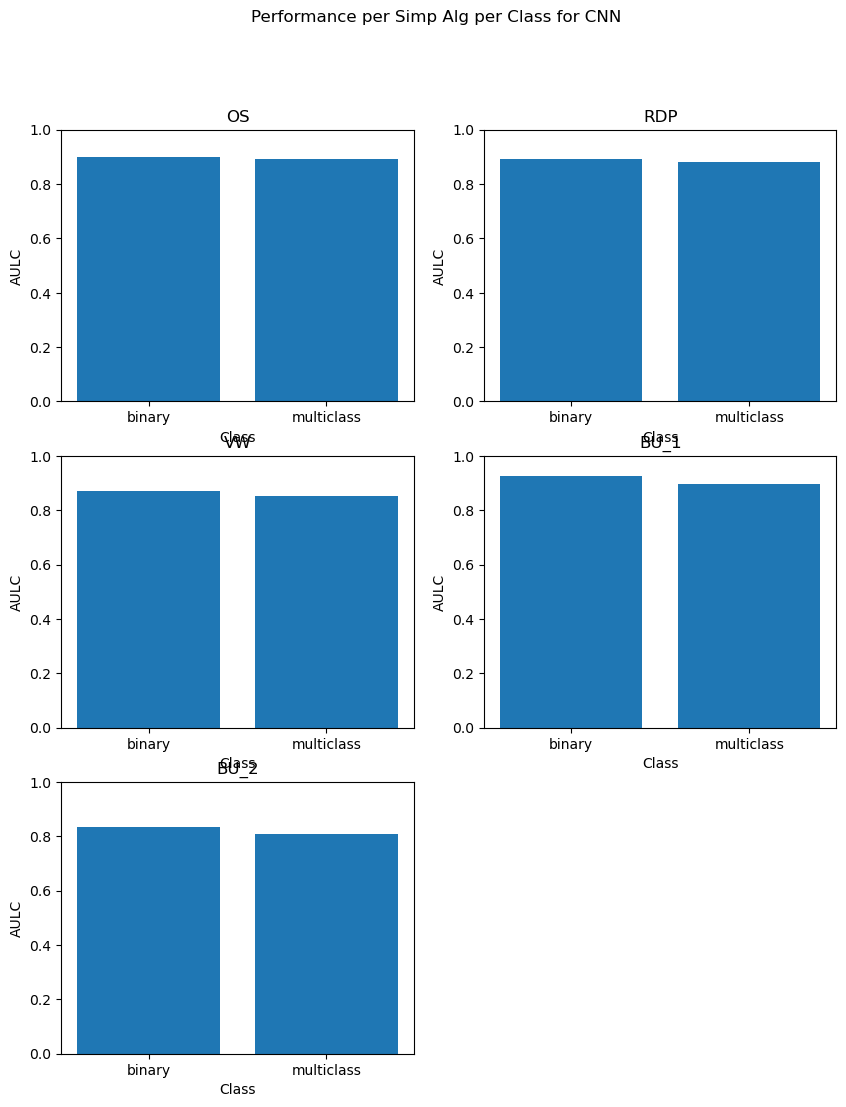

In [323]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

### By length

In [324]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [325]:
results_cnn_length = results_cnn
results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()
#print(results_cnn_length.head(5))

/tmp/ipykernel_7823/2137824416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()


In [326]:
results_cnn_alg_length_mean = results_cnn_length.groupby(["simp_algorithm", "length"])["performance"].mean()

print(results_cnn_alg_length_mean)

simp_algorithm  length
BU_1            15        0.96
                24        0.87
                70        0.73
                80        0.90
                82        0.92
                          ... 
VW              140       0.95
                144       0.90
                150       0.95
                152       0.95
                176       0.87
Name: performance, Length: 80, dtype: float64


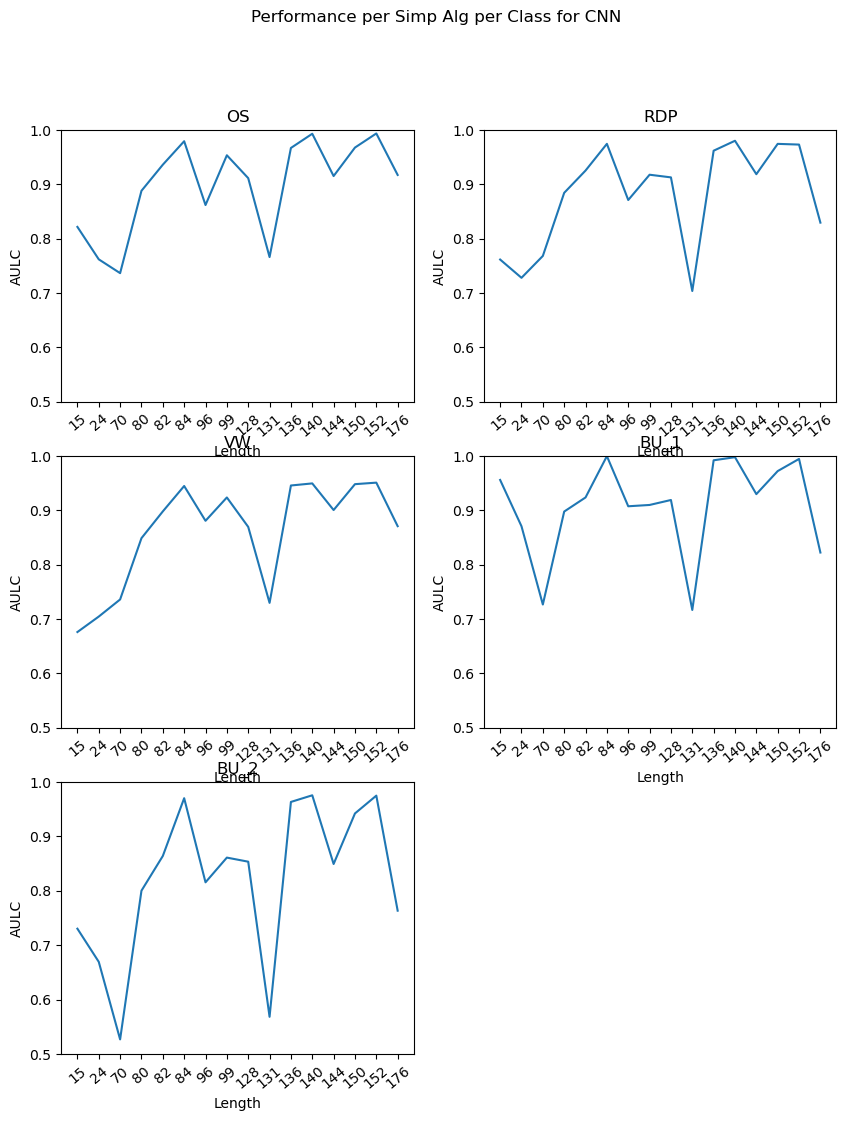

In [327]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.plot(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Length')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.5, 1.0)
    plt.xticks(rotation=40)
plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

### By Stationarity

In [328]:
dataset_stat = metadata[["dataset", "Stationary"]].to_dict()
dataset_stat_dict = pd.Series(metadata["Stationary"].values, index=metadata["dataset"].values).to_dict()
results_cnn_stat = results_cnn
results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()

results_cnn_alg_stat_mean = results_cnn_stat.groupby(["simp_algorithm", "stationary"])["performance"].mean()

/tmp/ipykernel_7823/961333341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()


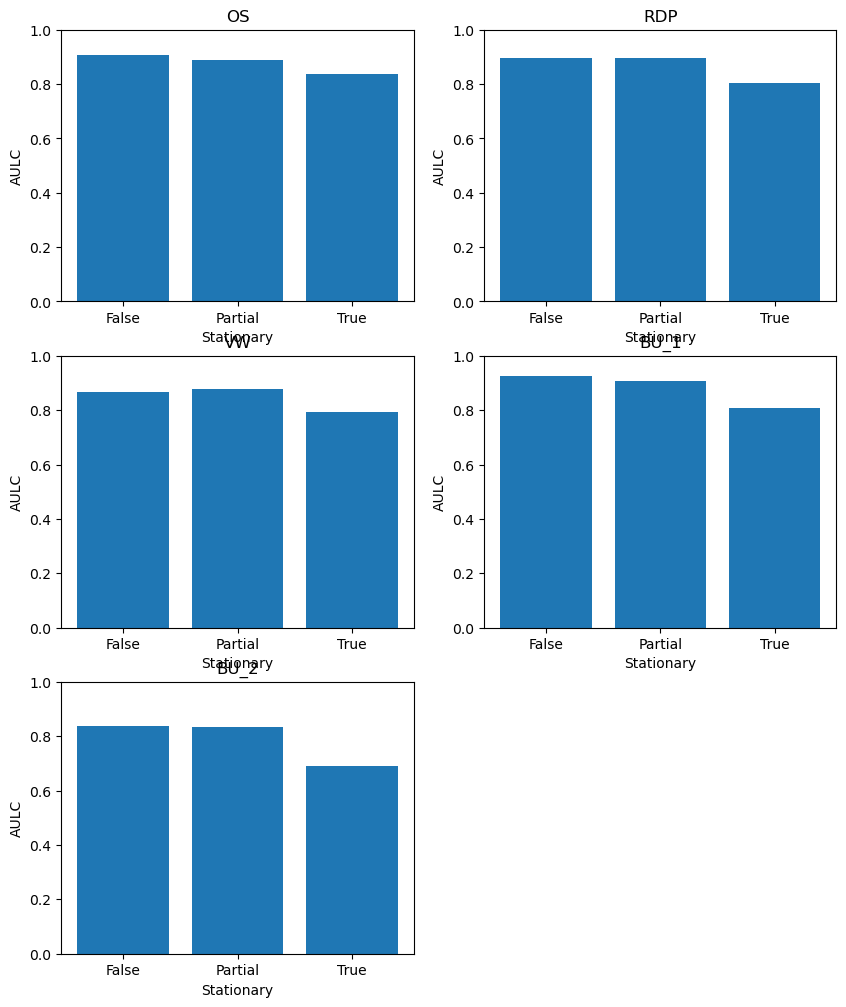

In [329]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_stat_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Stationary')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("")
plt.show()

### By Seasonality

In [330]:
dataset_season = metadata[["dataset", "Seasonal"]].to_dict()
dataset_season_dict = pd.Series(metadata["Seasonal"].values, index=metadata["dataset"].values).to_dict()
results_cnn_season = results_cnn
results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()

results_cnn_alg_season_mean = results_cnn_season.groupby(["simp_algorithm", "seasonal"])["performance"].mean()

/tmp/ipykernel_7823/36910846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()


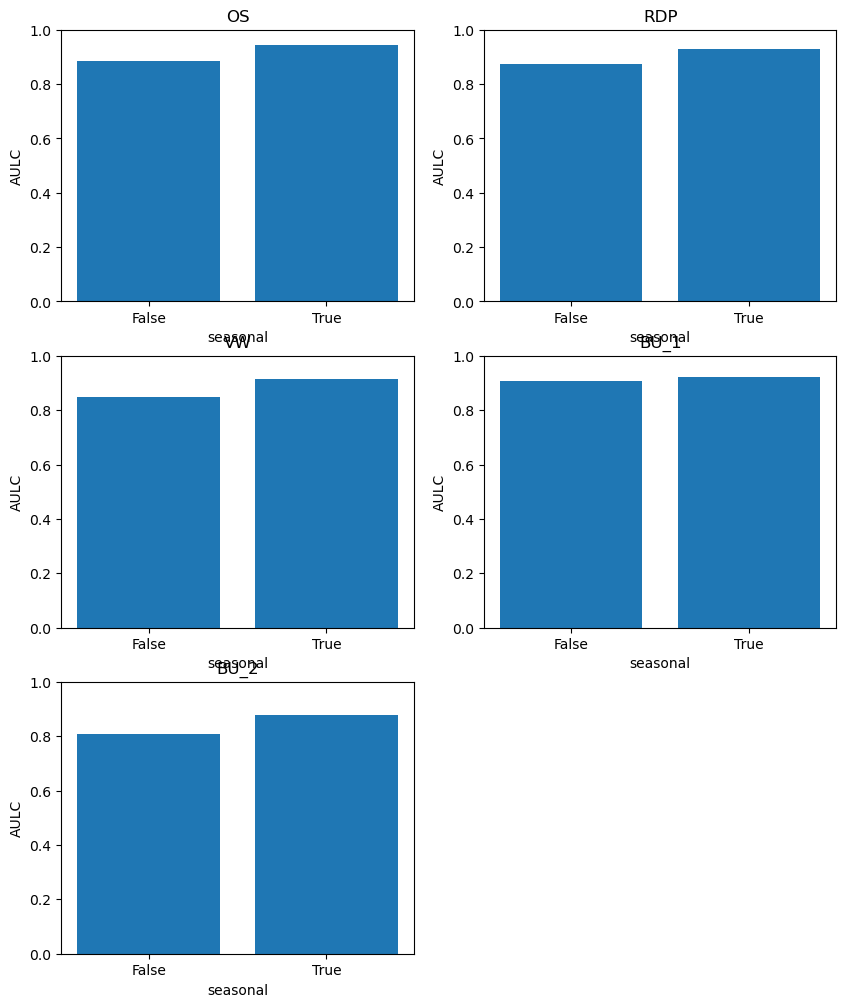

In [331]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_season_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('seasonal')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("")
plt.show()

### By Entropy

In [332]:
metadata["Entropy_bins"] = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2])

In [333]:
dataset_entropy = metadata[["dataset", "Entropy_bins"]].to_dict()
dataset_entropy_dict = pd.Series(metadata["Entropy_bins"].values, index=metadata["dataset"].values).to_dict()
results_cnn_entropy = results_cnn
results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()

results_cnn_alg_entropy_mean = results_cnn_entropy.groupby(["simp_algorithm", "entropy"])["performance"].mean()

/tmp/ipykernel_7823/4068135905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()


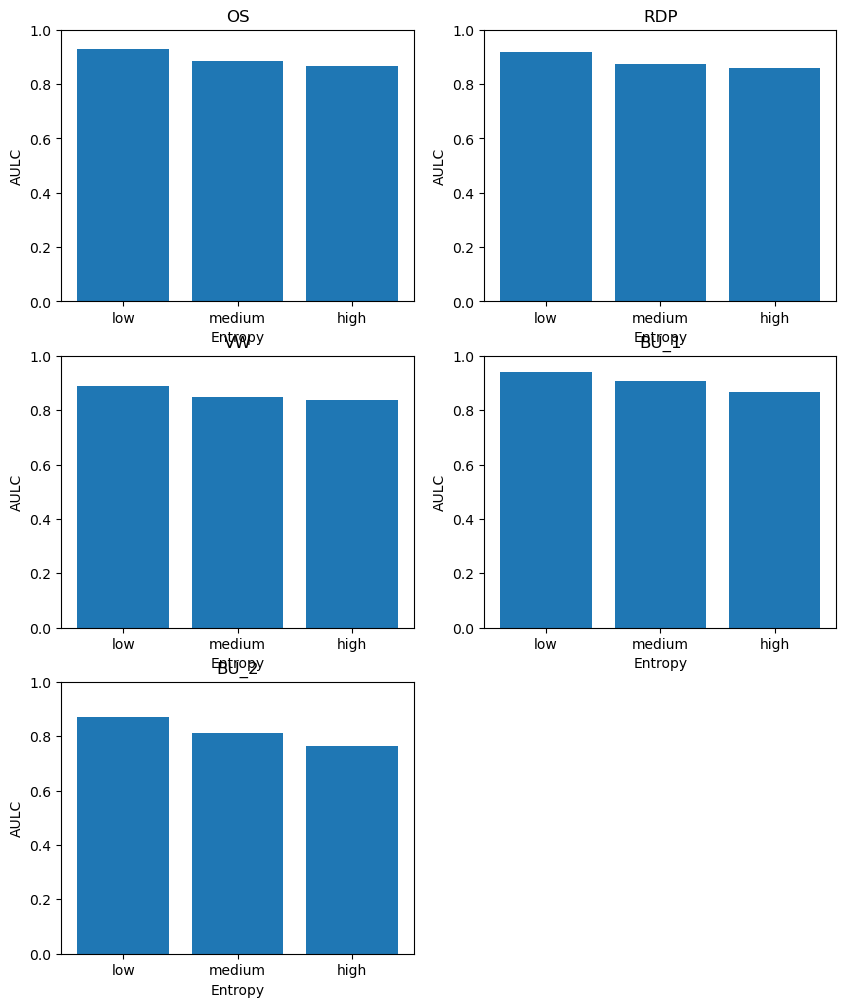

In [334]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_entropy_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Entropy')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks([0,1,2], ["low", "medium", "high"])

plt.suptitle("")
plt.show()

### Combined Properties

In [341]:
results_cnn_best_case = results_cnn.query(f"class_type == 'binary' & stationary == 'False' & seasonal == True & entropy == 0")
results_cnn_best_case

,dataset,model,simp_algorithm,performance,"knee(x,y)",time,class,class_type,length,stationary,seasonal,entropy
281,GunPointOldVersusYoung,cnn,OS,0.98,"(0.0402666666666667, 1.0)",0.0,2,binary,150,False,True,0
282,GunPointOldVersusYoung,cnn,RDP,0.99,"(0.0183333333333333, 1.0)",0.0,2,binary,150,False,True,0
283,GunPointOldVersusYoung,cnn,VW,0.96,"(1.0, 1.0)",0.0,2,binary,150,False,True,0
284,GunPointOldVersusYoung,cnn,BU_1,0.99,"(1.0, 1.0)",0.0,2,binary,150,False,True,0
285,GunPointOldVersusYoung,cnn,BU_2,0.97,"(1.0, 1.0)",0.0,2,binary,150,False,True,0
346,GunPointAgeSpan,cnn,OS,0.98,"(0.0652666666666666, 1.0)",0.0,2,binary,150,False,True,0
347,GunPointAgeSpan,cnn,RDP,0.98,"(0.0550666666666667, 1.0)",0.0,2,binary,150,False,True,0
348,GunPointAgeSpan,cnn,VW,0.96,"(0.0827333333333333, 1.0)",0.0,2,binary,150,False,True,0
349,GunPointAgeSpan,cnn,BU_1,0.99,"(0.0629333333333333, 1.0)",0.0,2,binary,150,False,True,0
350,GunPointAgeSpan,cnn,BU_2,0.96,"(0.1143333333333334, 1.0)",0.0,2,binary,150,False,True,0


In [348]:
auc_perf = np.array([round(result*100,2) for result in results_cnn_best_case["performance"].to_list()])
simp_alg = results_cnn_best_case["simp_algorithm"].unique()
auc_perf = np.array_split(auc_perf, 2)
datasets = results_cnn_best_case["dataset"].unique()

best_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)
best_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=['number']).mean()
best_resulting_table

,OS,RDP,VW,BU_1,BU_2
GunPointOldVersusYoung,97.65,98.64,95.59,99.41,97.35
GunPointAgeSpan,97.65,97.61,95.57,98.67,95.83
Mean,97.65,98.12,95.58,99.04,96.59


## Overall Tale

In [336]:
#results_cnn_alg_stat_mean

def dataframe_to_dict(df: pd.DataFrame, cls, add_string:str = "") -> dict:
    df_dict = df.to_dict()
    assert type(list(df_dict.keys())[0][1]) == type(cls), f"cls not matching types {type(list(df_dict.keys())[0][1])}, {type(cls)}"
    cls_dict = {key[0]:round(df_dict[key]*100,2) for key in df_dict if key[1] == cls}
    
    cls_dict["metric"] = add_string
    return cls_dict

In [347]:
rows = []
mean_auc_cnn_perc = [value*100 for value in mean_auc_cnn]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_auc_cnn_perc))
rows.append(mean)

class_dict_bin = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "binary", "Binary")
rows.append(class_dict_bin)
class_dict_mc = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "multiclass", "Multiclass")
rows.append(class_dict_mc)

stat_dict_true = dataframe_to_dict(results_cnn_alg_stat_mean, "True", "Stationary")
rows.append(stat_dict_true)
stat_dict_false = dataframe_to_dict(results_cnn_alg_stat_mean, "False", "Non-Stationary")
rows.append(stat_dict_false)
stat_dict_partial = dataframe_to_dict(results_cnn_alg_stat_mean, "Partial", "Partially-Stational")
rows.append(stat_dict_partial)

ses_dict_true = dataframe_to_dict(results_cnn_alg_season_mean, True, "Seasonal")
rows.append(ses_dict_true)
ses_dict_false = dataframe_to_dict(results_cnn_alg_season_mean, False, "Non-Seasonal")
rows.append(ses_dict_false)

entropy_dict_true = dataframe_to_dict(results_cnn_alg_entropy_mean, 0, "Low_Entropy")
rows.append(entropy_dict_true)
entropy_dict_false = dataframe_to_dict(results_cnn_alg_entropy_mean, 1, "Medium_Entropy")
rows.append(entropy_dict_false)
entropy_dict_partial = dataframe_to_dict(results_cnn_alg_entropy_mean, 2, "High_Entropy")
rows.append(entropy_dict_partial)

pd.set_option('display.precision', 2)

metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='BU_1', ascending=False)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU_1,BU_2,VW
metric,,,,,
Low_Entropy,92.83,91.91,94.16,87.21,89.01
Binary,90.02,89.20,92.72,83.59,86.96
Non-Stationary,90.53,89.70,92.58,83.97,86.82
Seasonal,94.26,92.86,92.23,87.99,91.54
Mean,89.53,88.52,90.93,82.07,85.96
Medium_Entropy,88.62,87.32,90.87,81.08,84.76
Partially-Stational,88.96,89.51,90.82,83.52,87.72
Non-Seasonal,88.44,87.51,90.63,80.70,84.68
Multiclass,89.16,87.98,89.53,80.89,85.18
